<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задачи" data-toc-modified-id="Задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задачи</a></span></li><li><span><a href="#Расчет-размеров-выборок" data-toc-modified-id="Расчет-размеров-выборок-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Расчет размеров выборок</a></span></li><li><span><a href="#Полученные-данные" data-toc-modified-id="Полученные-данные-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Полученные данные</a></span></li><li><span><a href="#Предобработка-данных-теста" data-toc-modified-id="Предобработка-данных-теста-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных теста</a></span><ul class="toc-item"><li><span><a href="#Проверим-наличие-пропусков" data-toc-modified-id="Проверим-наличие-пропусков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверим наличие пропусков</a></span></li><li><span><a href="#Проверим-наличие-дубликатов-и-пересечений-пользователей-в-группах" data-toc-modified-id="Проверим-наличие-дубликатов-и-пересечений-пользователей-в-группах-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверим наличие дубликатов и пересечений пользователей в группах</a></span></li><li><span><a href="#Время-затраченное-на-проведение-теста" data-toc-modified-id="Время-затраченное-на-проведение-теста-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Время затраченное на проведение теста</a></span></li></ul></li><li><span><a href="#Анализ-результатов-теста" data-toc-modified-id="Анализ-результатов-теста-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ результатов теста</a></span><ul class="toc-item"><li><span><a href="#Рассчитаем-достигнутый-эффект" data-toc-modified-id="Рассчитаем-достигнутый-эффект-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Рассчитаем достигнутый эффект</a></span></li><li><span><a href="#Посмотрим-на-график-кумулятивной-конверсии-по-группам" data-toc-modified-id="Посмотрим-на-график-кумулятивной-конверсии-по-группам-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Посмотрим на график кумулятивной конверсии по группам</a></span></li><li><span><a href="#Посмотрим-на-распределение-значений-конверсий-по-группам" data-toc-modified-id="Посмотрим-на-распределение-значений-конверсий-по-группам-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Посмотрим на распределение значений конверсий по группам</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Сформулируем-гипотезы" data-toc-modified-id="Сформулируем-гипотезы-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Сформулируем гипотезы</a></span></li><li><span><a href="#Выберем-критерий-и-проведем-тест" data-toc-modified-id="Выберем-критерий-и-проведем-тест-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Выберем критерий и проведем тест</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# A/B тестирование нового дизайна продающей страницы сайта

На сайте по продаже книг есть раздел с предложениями о покупке набора сразу из нескольких книг по более выгодной цене, чем при покупке их по отдельности.

Дизайнером сайта было предложено изменить эту страницу, так как по его мнению она слишком громоздкая и отпугивает некоторых потенциальных покупателей

Для принятия решения о внедрении нового дизайна было принято решение провести A/B тест. Так как у нас имеются данные о конверсии с данной страницы в 15%, мы рассчитали, что нам будет выгодно увеличение конверсии до 15.5%

## Задачи

- Рассчет размера выборки, по достижению которой мы остановим тест;
- Анализ результатов A/B тестирования и проверка гипотез о значимой разницы конверсий в группах теста.

## Расчет размеров выборок

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sm
from statsmodels.stats.proportion import proportions_ztest

Перед началом теста нам нужно рассчитать размеры выборок, по достижению которых мы сможем остановить тест, с учетом желаемого уровня прироста конверсии в 0.5 (в абсолютной величине с 0.15 до 0.155) с уровнем значимости в 5% и мощностью теста в 80%

In [2]:
round((0.155 - 0.150) / 0.150 * 100, 2)

3.33

Минимальное ожидаемое увеличение конверсии контрольной группы, относительно тестовой должно быть более 3.33%

In [3]:
effect_size = sm.proportion_effectsize(0.15, 0.155) 

round(sm.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05
))

81148

Для вышеуказанных параметров нам потребуется по 81148 наблюдений в каждой группе теста. Так как дневное среднее количество активных пользователей DAU = 13750, нам потребуется около 12 дней для проведения теста

## Полученные данные

`user_id` - идентификатор пользователя  
`timestamp` - дата перехода на страницу с предложениями  
`group` - группы теста  
`converted` - была ли совершена покупка

## Предобработка данных теста

In [4]:
df = pd.read_csv('./ab_data.csv', index_col=0)

In [5]:
df.head()

,user_id,timestamp,group,converted
131228,922696,2017-01-02 13:42:05.378582,treatment,1
184884,781507,2017-01-02 13:42:15.234051,control,1
83878,737319,2017-01-02 13:42:21.786186,control,0
102717,818377,2017-01-02 13:42:26.640581,treatment,0
158789,725857,2017-01-02 13:42:27.851110,treatment,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163418 entries, 131228 to 194557
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    163418 non-null  int64 
 1   timestamp  163418 non-null  object
 2   group      163418 non-null  object
 3   converted  163418 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 6.2+ MB


Приведем тип для колонки с датой в соответствие

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

### Проверим наличие пропусков

In [8]:
df.isna().sum()

user_id      0
timestamp    0
group        0
converted    0
dtype: int64

Пропуски отсутствуют

### Проверим наличие дубликатов и пересечений пользователей в группах

In [9]:
df.duplicated().sum()

0

Полные дубликаты отсутствуют. Теперь посмотрим на наличие пользователей, которые могли оказаться в обоих группах теста

In [10]:
dup_users = df[df['user_id'].duplicated(keep=False)].sort_values(by='user_id')
dup_users.head()

,user_id,timestamp,group,converted
101601,630145,2017-01-07 16:00:45.716146,control,0
101601,630145,2017-01-07 16:00:45.716146,treatment,0
28617,630603,2017-01-10 06:14:21.710946,control,0
28617,630603,2017-01-10 06:14:21.710946,treatment,0
209007,630738,2017-01-03 14:41:35.612088,control,0


In [11]:
df['user_id'].duplicated().sum()

1122

1122 пользователя оказались и в контрольной и в тестовой группе одновременно. Удалим не дубликаты, а полностью этих пользователей

In [12]:
len(df[df['user_id'].isin(dup_users['user_id']) == True])

2244

В итоге мы потеряем 2244 наблюдения, что допустимо

In [13]:
df = df[df['user_id'].isin(dup_users['user_id']) == False]

In [14]:
df['user_id'].duplicated().sum()

0

### Время затраченное на проведение теста

In [15]:
df['date'] = df['timestamp'].dt.date
df[['date']].agg(['min', 'max'])

,date
min,2017-01-02
max,2017-01-14


In [16]:
(df['date'].max() - df['date'].min()).days

12

Тест проводился на протяжении 12 дней

## Анализ результатов теста

### Рассчитаем достигнутый эффект

Посмотрим на конверсию в обоих группах теста

In [17]:
group_cr = (df.groupby('group')
              .agg(cr=('converted', 'mean'))
              .reset_index())

group_cr

,group,cr
0,control,0.148989
1,treatment,0.152733


В группе теста мы не достигли средней конверсии, которую мы считали на исторических данных нашего сайта. Посмотрим на отличие конверсии группы теста от конверсии контроля (lift)

In [18]:
round((group_cr['cr'].values[1] - group_cr['cr'].values[0]) / group_cr['cr'].values[0] * 100, 2)

2.51

Наблюдаемое увеличение конверсии тестовой группы относительно контрольной составило 2.51%, что меньше нашего минимального ожидаемого увеличения в 3.33%. Несмотря на это, было принято решение продолжить анализ результатов тестирования

### Посмотрим на график кумулятивной конверсии по группам

In [19]:
cum_data = (
    df.groupby(['date', 'group'])
      .agg(converted=('converted', 'sum'), 
           users=('user_id', 'nunique'))
)

cum_data = cum_data.cumsum()
cum_data['cr'] = cum_data['converted'] / cum_data['users']
cum_data = cum_data.reset_index()

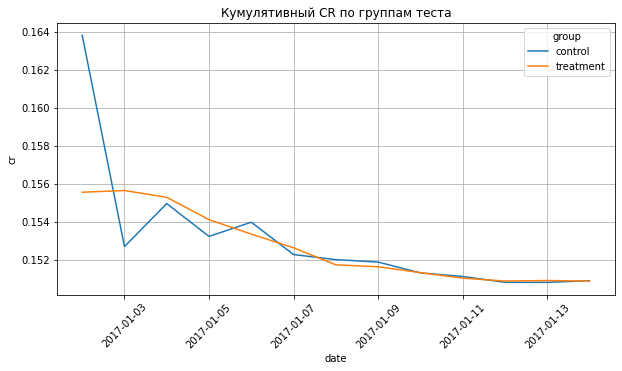

In [20]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=cum_data, 
    x='date', 
    y='cr', 
    hue='group'
)

plt.title('Кумулятивный CR по группам теста')
plt.grid()
plt.xticks(rotation=45)
plt.show()

К концу теста кумулятивные конверсии стабилизировались, что добавляет уверенности в правильном определении конца теста

## Проверка гипотез

### Сформулируем гипотезы

$H_{0}: CR_{A} = CR_{B}$  
$H_{1}: CR_{A} \neq CR_{B}$

**Основная (нулевая) гипотеза** - конверсии контрольной и тестовой группы не имеют статистически значимых различий;

**Альтернативная гипотеза** - конверсии контрольной и тестовой группы имеют статистически значимые различия.

### Выберем критерий и проведем тест

Так как мы имеем дело с конверсией, то есть с биномиальным распределением и у нас достаточно большие размеры выборок, мы можем аппроксимировать биномиальное распределение к нормальному. Поэтому проведем двухвыборочный z-test для долей

In [21]:
a_group_result = df[df['group'] == 'control']['converted']
b_group_result = df[df['group'] == 'treatment']['converted']

trials = len(a_group_result), len(b_group_result)
successes = a_group_result.sum(), b_group_result.sum()

z_stat, pval = proportions_ztest(successes, trials)

print(f'z-stat: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')

z-stat: -2.10
p-value: 0.036


In [22]:
def plot_confidence_interval(x, values, z=1.96):
    p = np.mean(values)
    n = len(values)
    se = np.sqrt((p * (1-p)) / n)
    confidence_interval = z * se
    
    
    horizontal_line_width=0.25
    color='#2187bb'
    left = x - horizontal_line_width / 2
    top = p - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = p + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, p, 'o', color='#f44336')
    plt.xticks([1, 2], ['Control', 'Treatment'])
    plt.grid(True)
    plt.title('Доверительные интервалы для групп эксперимента')

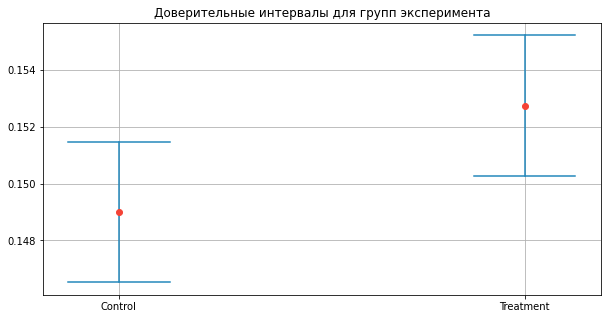

In [23]:
plt.figure(figsize=(10, 5))
plot_confidence_interval(1, a_group_result)
plot_confidence_interval(2, b_group_result)
plt.show()

У нас есть основания полагать, что конверсия тестовой группы значительно больше конверсии контрольной группы

## Выводы

- После проведения теста, мы не смогли достигнуть минимального ожидаемого эффекта в 3.33%, а только лишь 2.5%
- По результатам проверки гипотез, мы все таки можем полагать, что увеличение конверсии в тестовой группе значимо, но прийдется решить, будет ли нам выгодно внедрять изменение для увеличения конверсии на 2.5%